## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

combined_df = study_results.merge(mouse_metadata, how='left', on = "Mouse ID")

# Display the data table for preview

combined_df.head()

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.

total_mice = len(combined_df["Mouse ID"].unique())
print("Unique Mice : " + str(total_mice))


Unique Mice : 249


In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


df = pd.DataFrame(combined_df, columns=['Mouse ID', 'Timepoint'])
duplicate_rows_df = df[df.duplicated(['Mouse ID', 'Timepoint'])]
duplicate_rows_df


,Mouse ID,Timepoint
137,g989,0
360,g989,5
681,g989,10
869,g989,15
1111,g989,20


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

display(combined_df.loc[duplicate_rows_df.index])

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
137,g989,0,45.000000,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaner_df = combined_df.drop(duplicate_rows_df.index)
cleaner_df

,Mouse ID,Timepoint,Tumour Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [7]:
# Checking the number of mice in the clean DataFrame.

Total_records = len(cleaner_df.index)
print("Total Records : " + str(Total_records))


Total Records : 1888


## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumour volume for each regimen

df2 = cleaner_df.groupby("Drug Regimen")

df3 = df2.mean()
df4 = df3["Tumour Volume (mm3)"].squeeze()

df5 = df2.median()
df6 = df5["Tumour Volume (mm3)"].squeeze()

df7 = df2.std()
df8 = df7["Tumour Volume (mm3)"].squeeze()

df9  = df2.var()
df10 = df9["Tumour Volume (mm3)"].squeeze()

df11  = df2.sem()
df12 = df11["Tumour Volume (mm3)"].squeeze()

df13 = pd.merge(df4, df6 ,how="left", on=["Drug Regimen"])
df13.rename(columns = {"Tumour Volume (mm3)_x" : "Mean Value", "Tumour Volume (mm3)_y" : "Median Value"}, inplace = True)
# df8
df13 = pd.merge(df13, df8 ,how="left", on=["Drug Regimen"])
df13.rename(columns={"Tumour Volume (mm3)" : "STD Value"}, inplace = True)

df13 = pd.merge(df13, df10 ,how="left", on=["Drug Regimen"])
df13.rename(columns={"Tumour Volume (mm3)" : "Var Value"}, inplace = True)

df13 = pd.merge(df13, df12 ,how="left", on=["Drug Regimen"])
df13.rename(columns={"Tumour Volume (mm3)" : "SEM Value"}, inplace = True)

df13

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.



,Mean Value,Median Value,STD Value,Var Value,SEM Value
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Propriva,52.393463,50.909965,6.568014,43.138803,0.525862
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111


In [116]:
# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

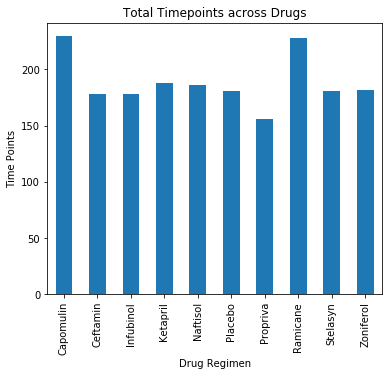

<Figure size 432x288 with 0 Axes>

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

df2 = cleaner_df.groupby("Drug Regimen").count()
df3 = df2["Timepoint"].squeeze()
df3.plot(kind="bar", figsize=(6,5))

# Set a title for the chart
plt.title("Total Timepoints across Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")

plt.show()
plt.tight_layout()

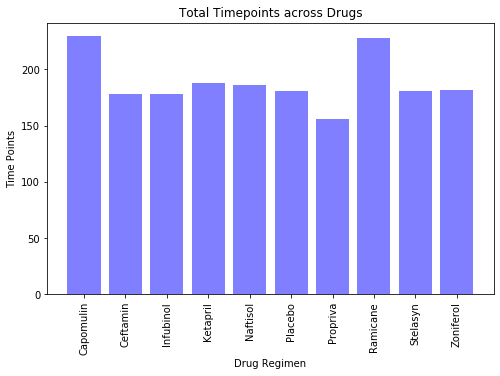

<Figure size 432x288 with 0 Axes>

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

df2 = cleaner_df.groupby("Drug Regimen").count()

df3 = df2.reset_index()

x_axis = np.arange(len(df3))

tick_locations = [value for value in x_axis]

plt.figure(figsize=(8,5))

plt.bar(x_axis, df3["Timepoint"], color='b', alpha=0.5, align="center")

plt.xticks(tick_locations, df3["Drug Regimen"], rotation="vertical")

# # Set a title for the chart

plt.title("Total Timepoints across Drugs")
plt.xlabel("Drug Regimen")
plt.ylabel("Time Points")

plt.show()
plt.tight_layout()

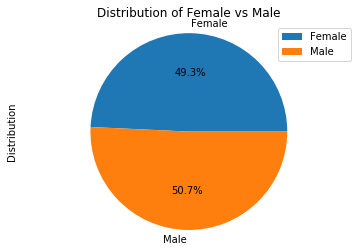

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
dfd4 = cleaner_df.groupby("Sex").count()
dfd5 = dfd4["Timepoint"].squeeze()
dfd6 = dfd5.reset_index()
dfd7 = dfd6.set_index("Sex")
dfd7.rename(columns = {"Timepoint" : "Distribution"}, inplace = True)

gender_pie = dfd7.plot(kind="pie", y='Distribution', title=("Distribution of Female vs Male"), autopct='%1.1f%%')

plt.axis("equal")
plt.show()

(-1.1179900164988374,
 1.1067252436799584,
 -1.1132609815137346,
 1.1081858927805142)

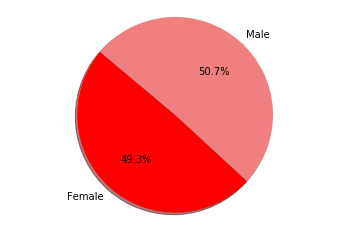

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

df4 = cleaner_df.groupby("Sex").count()
df5 = df4["Timepoint"].squeeze()
df6 = df5.reset_index()
labels = df6["Sex"]
sizes = df6["Timepoint"]
colours = ["red", "lightcoral"]
explode = (0, 0)
plt.pie(sizes, explode=explode, labels=labels, colors=colours,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.axis("equal")

## Quartiles, Outliers and Boxplots

In [51]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
new_mouse_df = mouse_metadata.copy()

dfx = cleaner_df.groupby("Mouse ID").max()
dfd = dfx.reset_index()
newdf = new_mouse_df.merge(dfd, how='left')
newdf.sort_values(by=["Mouse ID"])


# Merge this group df with the original dataframe to get the tumour volume at the last timepoint


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
49,a203,Infubinol,Female,20,23,45,67.973419,2
50,a251,Infubinol,Female,21,25,45,65.525743,1
51,a262,Placebo,Female,17,29,45,70.717621,4
52,a275,Ceftamin,Female,20,28,45,62.999356,3
53,a366,Stelasyn,Female,16,29,30,63.440686,1
...,...,...,...,...,...,...,...,...
245,z435,Propriva,Female,12,26,10,48.710661,0
8,z578,Ramicane,Male,11,16,45,45.000000,0
246,z581,Infubinol,Female,24,25,45,62.754451,3
247,z795,Naftisol,Female,13,29,45,65.741070,3


In [61]:
# Put treatments into a list for for loop (and later for plot labels)

druglist = newdf["Drug Regimen"].unique()
druglist

# Create empty list to fill with tumour vol data (for plotting)

tumordata = []
tumordata = newdf["Tumour Volume (mm3)"]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumour volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

0      45.000000
1      45.000000
2      45.473753
3      45.000000
4      45.851531
         ...    
244    45.934712
245    48.710661
246    62.754451
247    65.741070
248    73.867845
Name: Tumour Volume (mm3), Length: 249, dtype: float64

In [15]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest


## Line and Scatter Plots

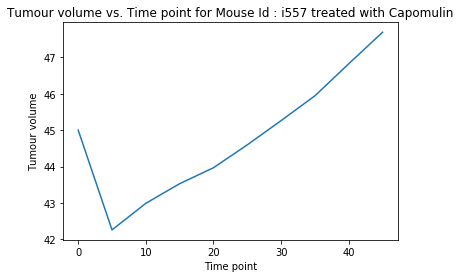

In [71]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
# creating a dataframe

one_mouse_df = cleaner_df.loc[cleaner_df["Mouse ID"] == "i557"]
one_mouse_df

x_axis_data = one_mouse_df["Timepoint"]
x_axis_data

y_axis_data = one_mouse_df["Tumour Volume (mm3)"]
y_axis_data

plt.plot(x_axis_data, y_axis_data)

plt.title("Tumour volume vs. Time point for Mouse Id : i557 treated with Capomulin")
plt.xlabel("Time point")
plt.ylabel("Tumour volume")

plt.show()


# new_mouse_df

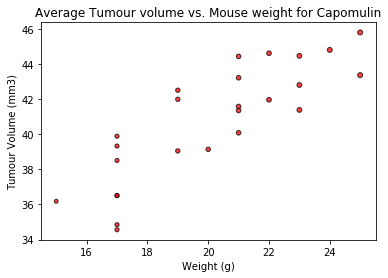

In [89]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
one_drug_df = cleaner_df.loc[cleaner_df["Drug Regimen"] == "Capomulin"]
mouse_group_df = one_drug_df.groupby("Mouse ID").mean()
mouse_group_df

x_axis = mouse_group_df["Weight (g)"]
y_axis = mouse_group_df["Tumour Volume (mm3)"]

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black", s=x_axis, alpha=0.75)

plt.title("Average Tumour volume vs. Mouse weight for Capomulin")
plt.xlabel("Weight (g)")
plt.ylabel("Tumour Volume (mm3)")

plt.show()

## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen
